In [78]:
# Load in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
plt.rcParams["figure.figsize"] = (10,8)

In [67]:
# đọc dữ liệu
df = pd.read_csv('D:\Desktop\Data_Analyst\Jupiter_Notebook_Pandas\Pandas\\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Vẽ biểu đồ để trực quan hóa mối quan hệ giữa lượng sản phẩm được bán ra với lần lượt chi phí quảng  cáo trên TV, Radio và báo chí bằng hình ảnh, dùng 1 biểu đồ cho mỗi loại hình quảng cáo.

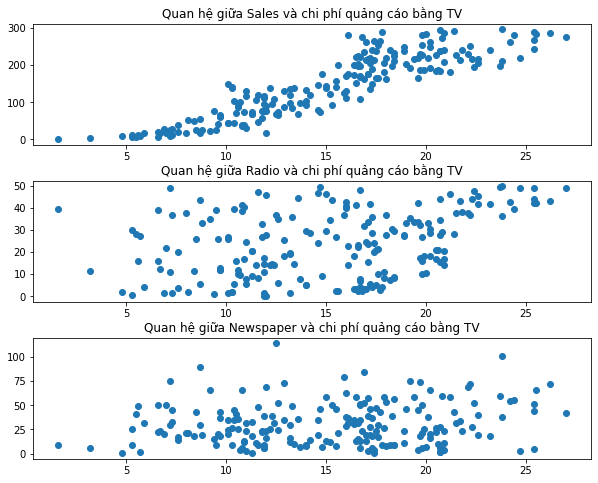

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
ax1.scatter(df.Sales, df.TV)
ax2.scatter(df.Sales, df.Radio)
ax3.scatter(df.Sales, df.Newspaper)
ax1.set_title('Quan hệ giữa Sales và chi phí quảng cáo bằng TV')
ax2.set_title('Quan hệ giữa Radio và chi phí quảng cáo bằng TV')
ax3.set_title('Quan hệ giữa Newspaper và chi phí quảng cáo bằng TV');

#### Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [69]:
y = df['Sales'].values # y thực tế
X = df.drop(columns=['Sales']).values # các feature
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [70]:
y = y.reshape(-1,1)
X = X.reshape(-1,3)
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


In [71]:
# chia tập dữ liệu
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42) # randon_state mỗi máy giống nhau thì kết quả random ra cũng giống nhau
# 80% train 20% test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


#### Từ dữ liệu huấn luyện xây dựng mô hình hồi quy tuyến tính đơn biến với biến đầu vào là chi phí quảng cáo trên TV và lượng hàng bán ra. Dùng dữ liệu kiểm tra để đánh giá mô hình. 

In [72]:
# có nghĩa là dùng chi phí quảng cáo trên tv để đoán số lượng sản phẩm bán ra
y1 = df['Sales'].values.reshape(-1,1) # y thực tế
X1 = df['TV'].values.reshape(-1,1) # các feature
print(X1.shape)
print(y1.shape)

(200, 1)
(200, 1)


In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X1_train, y1_train) #Huấn luyện mô hình
print( "Mô hình hồi quy sẽ có dạng: y = a + b * x với các hệ số a và b lần lượt là")
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: y = a + b * x với các hệ số a và b lần lượt là
[7.16227597]
[[0.0544343]]


In [74]:
y1_pred = regressor.predict(X1_test) # dự đoán trên số năm kinh nghiệm của bộ dữ liệu test
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,mean_squared_error
r2_train = r2_score(y1_train, regressor.predict(X1_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y1_test, y1_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))
print('Mean_squared_error =',mean_squared_error(y1_test,y1_pred))

R2 trên tập huấn luyện của model là:0.8134588121404831
R2 trên tập kiểm tra của model là:0.8010943934328408
Mean_squared_error = 6.639091226559296


#### Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là lượng hàng bán ra, các biến đầu vào là chi phí cho cả 3 loại hình quảng cáo. Đánh giá mô hình.

In [75]:
#Create a regressor object
LR= LinearRegression()
#Fit training set to the regressor
LR.fit(X_train,y_train)
print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = [4.7141264]
Coefficients: [[0.05450927 0.10094536 0.00433665]]


In [76]:
### Sử dụng mô hình 
y_prediction = LR.predict(X_test)
y_prediction

array([[17.0347724 ],
       [20.40974033],
       [23.72398873],
       [ 9.27278518],
       [21.68271879],
       [12.56940161],
       [21.08119452],
       [ 8.69035045],
       [17.23701254],
       [16.66657475],
       [ 8.92396497],
       [ 8.4817344 ],
       [18.2075123 ],
       [ 8.06750728],
       [12.64550975],
       [14.93162809],
       [ 8.12814594],
       [17.89876565],
       [11.00880637],
       [20.47832788],
       [20.80631846],
       [12.59883297],
       [10.9051829 ],
       [22.38854775],
       [ 9.41796094],
       [ 7.92506736],
       [20.83908497],
       [13.81520938],
       [10.77080925],
       [ 7.92682509],
       [15.95947357],
       [10.63490851],
       [20.80292008],
       [10.43434164],
       [21.5784752 ],
       [21.18364487],
       [12.12821771],
       [22.80953262],
       [12.60992766],
       [ 6.46441252]])

In [77]:
# Calculate R2-score
score=r2_score(y_test,y_prediction)
print('R2-score is ',score)
print('Mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('Root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

R2-score is  0.9059011844150826
Mean_sqrd_error is = 2.9077569102710896
Root_mean_squared error of is = 1.7052146229349223
